In [1]:
import pandas as pd 
import os
import matplotlib.pyplot as plt

In [2]:
folder = './results/'

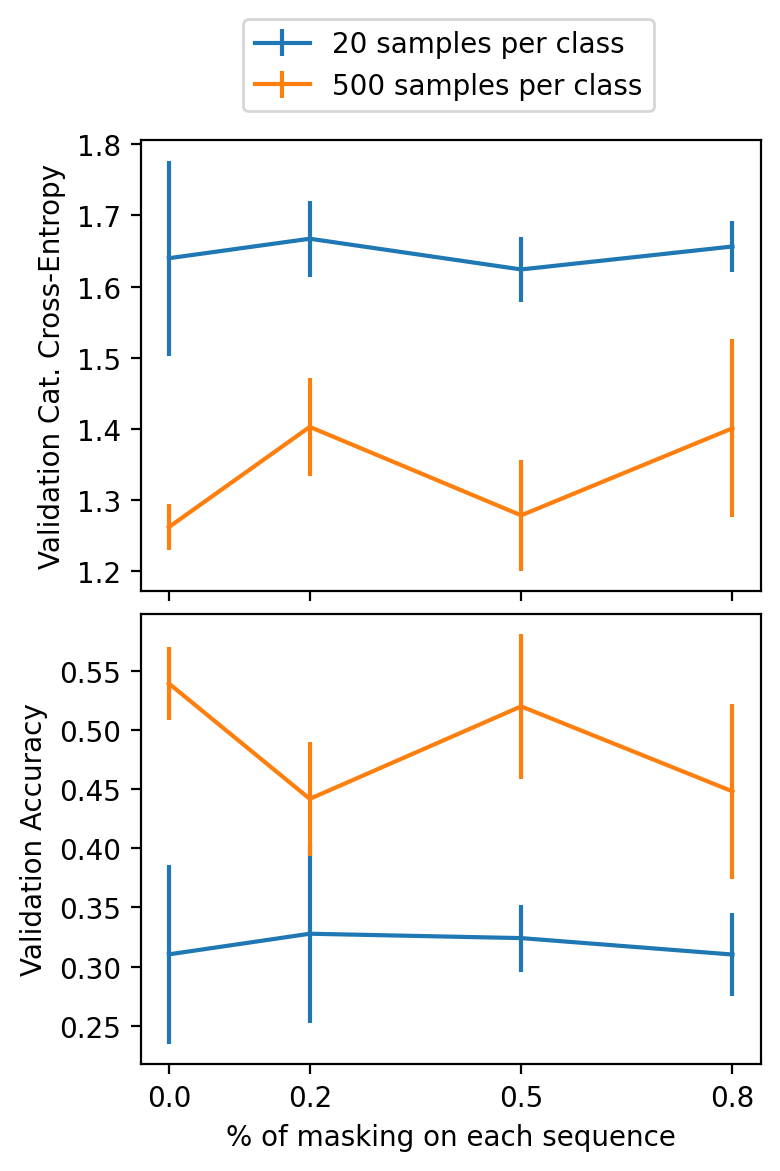

In [61]:
fig, axes = plt.subplots(2, 1, figsize=(4,6), sharex=True, dpi=200,
                         gridspec_kw={'hspace': 0.05, 'wspace': 0.03})
for dataset in ['alcock']:
    for fold_n in range(1):
        for subset in ['20', '500']:
            
            subset_mean = []
            subset_std  = []
            
            acc_mean = []
            acc_std  = []
            
            msk_values = [0.0, 0.2, 0.5, 0.8]
            for msk in msk_values:
                exp = f'alcock_{fold_n}.msk_{msk}.rnd_0.sme_0'    
                fold_frames = []
                for fold_n_2 in range(3):
                    metrics = os.path.join(folder,
                                           exp, 
                                           dataset, 
                                           'classification', 
                                           'a', 
                                           f'{dataset}_{subset}_f{fold_n_2}',
                                           'metrics.csv')
                    frame = pd.read_csv(metrics)
                    fold_frames.append(frame)
                
                fold_frames = pd.concat(fold_frames)
                
                subset_mean.append(fold_frames['val_loss'].mean())
                subset_std.append(fold_frames['val_loss'].std())
            
                acc_mean.append(fold_frames['val_acc'].mean())
                acc_std.append(fold_frames['val_acc'].std())
                
                
              
            axes[0].errorbar(msk_values, subset_mean, yerr=subset_std, label=subset+' samples per class')
            axes[1].errorbar(msk_values, acc_mean, yerr=acc_std, label=subset+' samples per class')
            
        axes[0].set_xticks(msk_values)
        axes[0].set_ylabel(r'Validation Cat. Cross-Entropy')
        axes[0].legend(ncol=1, bbox_to_anchor = (.85, 1.3))
        
        axes[1].set_xticks(msk_values)
        axes[1].set_xlabel('% of masking on each sequence')
        axes[1].set_ylabel('Validation Accuracy')